# CQF Exam 1
**Author:** David Lazarou

**Date:**  2 April 2025

# Optimal Portfolio Allocation

# Question 1

Given:

- Expected returns:
  $\boldsymbol{\mu} = \begin{bmatrix} 0.02 \\ 0.07 \\ 0.15 \\ 0.20 \end{bmatrix}$

- Standard deviations:
  $\boldsymbol{\sigma} = \begin{bmatrix} 0.05 \\ 0.12 \\ 0.17 \\ 0.25 \end{bmatrix}$

- Correlation matrix $\mathbf{R}$:
  $\begin{bmatrix}
  1 & 0.3 & 0.3 & 0.3 \\
  0.3 & 1 & 0.6 & 0.6 \\
  0.3 & 0.6 & 1 & 0.6 \\
  0.3 & 0.6 & 0.6 & 1
  \end{bmatrix}$

The covariance matrix is computed as:

$\Sigma_{ij} = \rho_{ij} \cdot \sigma_i \cdot \sigma_j$

And that we consider:

$$
\begin{aligned}
\min_{\mathbf{w}} \quad & \frac{1}{2} \mathbf{w}^\top \Sigma \mathbf{w} \\
\text{s.t.} \quad & \mathbf{w}^\top \mathbf{1} = 1 \quad \text{(budget constraint)} \\
& \mathbf{w}^\top \boldsymbol{\mu} = m \quad \text{(target portfolio return)}
\end{aligned}
$$

a) Formulate the Lagrangian and give partial derivatives

The Lagrangian function is formed using two Lagrange multipliers:

- $\lambda_1$ for the budget constraint
- $\lambda_2$ for the target return constraint

$$
\mathcal{L}(\mathbf{w}, \lambda_1, \lambda_2) =
\frac{1}{2} \mathbf{w}^\top \Sigma \mathbf{w}
- \lambda_1 (\mathbf{w}^\top \mathbf{1} - 1)
- \lambda_2 (\mathbf{w}^\top \boldsymbol{\mu} - m)
$$

And the partial derivatives of the Lagrangian are:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \Sigma \mathbf{w} - \lambda_1 \mathbf{1} - \lambda_2 \boldsymbol{\mu}
$$

$$
\frac{\partial \mathcal{L}}{\partial \lambda_1} = 1 - \mathbf{w}^\top \mathbf{1}
$$

$$
\frac{\partial \mathcal{L}}{\partial \lambda_2} = m - \mathbf{w}^\top \boldsymbol{\mu}
$$
b) Write down the analytical solution for **$\mathbf{w}^\star$** optimal allocations — no derivation required

Let:

- $A = \mathbf{1}^\top \Sigma^{-1} \mathbf{1}$
- $B = \mathbf{1}^\top \Sigma^{-1} \boldsymbol{\mu}$
- $C = \boldsymbol{\mu}^\top \Sigma^{-1} \boldsymbol{\mu}$
- $\Delta = AC - B^2$

These above are denoted Scalar Quantities in my code

- Then the optimal allocation is:

$$
\mathbf{w}^\star = \Sigma^{-1} \left( \frac{C - mB}{\Delta} \mathbf{1} + \frac{mA - B}{\Delta} \boldsymbol{\mu} \right)
$$

c) Compute allocations **$\mathbf{w}^\star$** and portfolio risk **$\sigma_\Pi$** for target return **$m = 4.5\%$**

- Optimal allocation vector $\mathbf{w}^\star$
- Portfolio risk:
  $\sigma_\Pi = \sqrt{ \mathbf{w}^{\star \top} \Sigma \mathbf{w}^\star }$

Then using the analytical solution:
$\mathbf{w}^\star = \Sigma^{-1} \left( \frac{C - mB}{\Delta} \mathbf{1} + \frac{mA - B}{\Delta} \boldsymbol{\mu} \right)$



In [39]:
import numpy as np

# Target return
m = 0.045

# Expected returns vector
mu = np.array([0.02, 0.07, 0.15, 0.20])

# Standard deviations
sigma = np.array([0.05, 0.12, 0.17, 0.25])

# Correlation matrix
R = np.array([
    [1.0, 0.3, 0.3, 0.3],
    [0.3, 1.0, 0.6, 0.6],
    [0.3, 0.6, 1.0, 0.6],
    [0.3, 0.6, 0.6, 1.0]
])

# Covariance matrix: Sigma = diag(sigma) * R * diag(sigma)
Sigma = np.outer(sigma, sigma) * R

# Precompute inverse of covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Vector
ones = np.ones_like(mu)

# Compute scalar quantities A, B, C, Delta
A = ones.T @ Sigma_inv @ ones
B = ones.T @ Sigma_inv @ mu
C = mu.T @ Sigma_inv @ mu
Delta = A * C - B**2

# Lagrange multipliers
lambda_1 = (C - m * B) / Delta
lambda_2 = (m * A - B) / Delta

# Optimal portfolio weights
w_star = Sigma_inv @ (lambda_1 * ones + lambda_2 * mu)

# Portfolio risk
portfolio_variance = w_star.T @ Sigma @ w_star
portfolio_std = np.sqrt(portfolio_variance)

# Print Scalar quantities
print("\n--- Scalar Quantities ---")
print("A =", round(A, 4))
print("B =", round(B, 4))
print("C =", round(C, 4))
print("Delta =", round(Delta, 4))

# Print results
print("\n--- Results ---")
print("Optimal weights w* =", np.round(w_star, 4))
print("Portfolio expected return (mu) =", round(w_star @ mu, 4))
print("Portfolio standard deviation (σΠ) =", round(portfolio_std, 4))



--- Scalar Quantities ---
A = 423.615
B = 6.807
C = 0.9065
Delta = 337.6752

--- Results ---
Optimal weights w* = [0.7851 0.0539 0.1336 0.0275]
Portfolio expected return (mu) = 0.045
Portfolio standard deviation (σΠ) = 0.0584



## Question 2

### Experiment Objectives

- Generate 700 random weight vectors $ \mathbf{w} \in \mathbb{R}^4 $, where each satisfies $ \mathbf{w}^\top \mathbf{1} = 1 $
- Allow weights to be negative
- For each portfolio:
  - Compute expected return: $ \mu_\Pi = \mathbf{w}^\top \boldsymbol{\mu} $
  - Compute portfolio risk (standard deviation): $ \sigma_\Pi = \sqrt{\mathbf{w}^\top \Sigma \mathbf{w}} $
- Plot all portfolios on a risk-return diagram (risk on x-axis, return on y-axis)
- Identify the shape and explain the plot



In [40]:
import matplotlib.pyplot as plt

# Number of portfolios
n_portfolios = 700

# Storage for results
portfolio_returns = []
portfolio_risks = []

# Random portfolio generator
np.random.seed(42)  # reproducibility

for _ in range(n_portfolios):
    # Generate 3 random weights from normal distribution
    w_partial = np.random.randn(3)

    # Solve for w4 so that sum(w) = 1
    w4 = 1 - np.sum(w_partial)
    w = np.append(w_partial, w4)

    # Compute portfolio return and risk
    mu_pi = w @ mu
    sigma_pi = np.sqrt(w.T @ Sigma @ w)

    portfolio_returns.append(mu_pi)
    portfolio_risks.append(sigma_pi)


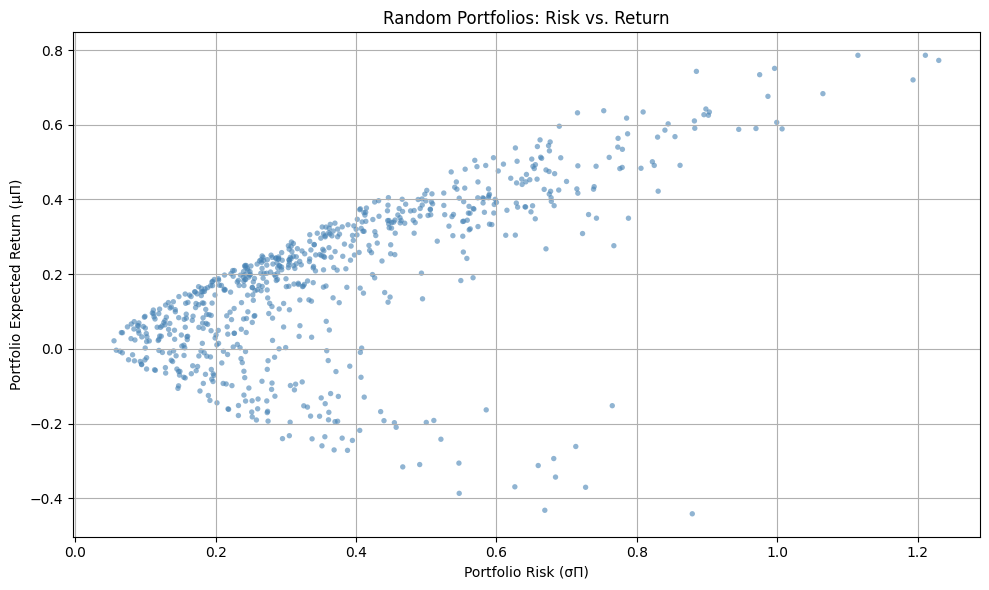

In [41]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns, c='steelblue', alpha=0.6, s=15, edgecolors='none')
plt.xlabel('Portfolio Risk (σΠ)')
plt.ylabel('Portfolio Expected Return (μΠ)')
plt.title('Random Portfolios: Risk vs. Return')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation

The plotted points represent randomly generated portfolios that satisfy the constraint
$\mathbf{w}^\top \mathbf{1} = 1$, meaning the weights sum to 1.

However, as the weights are **not constrained to be positive** or optimal, they may include **negative values** (short positions) and **leverage** (weights greater than 1 in absolute terms).

We observe:

- The shape resembles a **horizontal V** rather than the familiar **concave efficient frontier**, which typically plots **only optimal risky portfolios**.

- A significant number of portfolios exhibit **negative expected returns**, in some cases as low as **-40%**. This reflects the inclusion of **highly leveraged and short-heavy portfolios** among the 700 randomly generated samples.

- Portfolio **risk (volatility)** can also be **very high**, reaching over **120%**, again a result of extreme portfolio weightings due to the lack of constraints on shorting or leverage.

 ## Question 3

a) Compute sensitivities of VaR and ES with respect to each asset

Given:

- Expected returns:
  $\boldsymbol{\mu} = \begin{bmatrix} 0.00 \\ 0.00 \\ 0.00 \end{bmatrix}$

- Standard deviations:
  $\boldsymbol{\sigma} = \begin{bmatrix} 0.30 \\ 0.20 \\ 0.15 \end{bmatrix}$

- Portfolio weights:
  $\boldsymbol{w} = \begin{bmatrix} 0.50 \\ 0.20 \\ 0.30 \end{bmatrix}$

- Correlation matrix $\mathbf{R}$:
  $\begin{bmatrix}
  1.0 & 0.8 & 0.5 \\
  0.8 & 1.0 & 0.3 \\
  0.5 & 0.3 & 1.0
  \end{bmatrix}$


The covariance matrix is computed as:
$\Sigma_{ij} = \rho_{ij} \cdot \sigma_i \cdot \sigma_j$

We define:

- Portfolio volatility:
  $\sigma_\Pi = \sqrt{ \boldsymbol{w}^\top \Sigma \boldsymbol{w} }$

- Quantile of the standard normal:
  $z = \Phi^{-1}(1 - c)$

- Standard normal PDF evaluated at $z$:
  $\phi(z)$

We then compute:

- Sensitivity of VaR with respect to $w_i$:
  $\frac{\partial \text{VaR}}{\partial w_i} = \mu_i + z \cdot \frac{ (\Sigma \boldsymbol{w})_i }{ \sigma_\Pi }$

- Sensitivity of ES with respect to $w_i$:
  $\frac{\partial \text{ES}}{\partial w_i} = \mu_i - \frac{ \phi(z) }{ 1 - c } \cdot \frac{ (\Sigma \boldsymbol{w})_i }{ \sigma_\Pi }$

These represent the **change in portfolio VaR or ES** for a small increase in the weight of asset $i$, holding all else constant.


In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Expected returns
mu = np.array([0.00, 0.00, 0.00])

# Standard deviations
sigma = np.array([0.30, 0.20, 0.15])

# Portfolio weights
weights = np.array([0.50, 0.20, 0.30])

# Correlation matrix
corr = np.array([
    [1.0, 0.8, 0.5],
    [0.8, 1.0, 0.3],
    [0.5, 0.3, 1.0]
])

# 1: Covariance matrix
D = np.diag(sigma)
Sigma = D @ corr @ D

# Step 2: Portfolio volatility
sigma_pi = np.sqrt(weights.T @ Sigma @ weights)

# Step 3: z and phi(z)
c = 0.99
z = norm.ppf(1 - c)          # ≈ -2.326
phi_z = norm.pdf(z)          # ≈ 0.026

# Step 4: Compute sensitivities
Sigma_w = Sigma @ weights

dVaR_dw = mu + z * (Sigma_w / sigma_pi)
dES_dw = mu - (phi_z / (1 - c)) * (Sigma_w / sigma_pi)

# Step 5: Summary table
df = pd.DataFrame({
    "Asset": ["Asset 1", "Asset 2", "Asset 3"],
    "Weight": weights,
    "Sigma": sigma,
    "VaR sensitivity": dVaR_dw,
    "ES sensitivity": dES_dw
})

print(df)


     Asset  Weight  Sigma  VaR sensitivity  ES sensitivity
0  Asset 1     0.5   0.30        -0.683865       -0.783480
1  Asset 2     0.2   0.20        -0.386799       -0.443142
2  Asset 3     0.3   0.15        -0.220709       -0.252859


## Question 4

- Compute the standardized value of Expected Shortfall for the range of percentiles
[99.95; 99.75; 99.5; 99.25; 99; 98.5; 98; 97.5].

- Organize results into a table


In [23]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define confidence levels as decimals
confidence_levels = np.array([99.95, 99.75, 99.5, 99.25, 99, 98.5, 98, 97.5]) / 100

# Compute z = Φ⁻¹(1 - c)
z_values = norm.ppf(1 - confidence_levels)

# Compute ϕ(z)
phi_values = norm.pdf(z_values)

# Compute standardised Expected Shortfall: ES_c = -ϕ(z) / (1 - c)
ES_values = -phi_values / (1 - confidence_levels)

# Create DataFrame
es_table = pd.DataFrame({
    "Confidence Level (%)": confidence_levels * 100,
    "z = Φ⁻¹(1 - c)": z_values,
    "ϕ(z)": phi_values,
    "Standardised ES": ES_values
})

# Display result
print(es_table)


   Confidence Level (%)  z = Φ⁻¹(1 - c)      ϕ(z)  Standardised ES
0                 99.95       -3.290527  0.001777        -3.554381
1                 99.75       -2.807034  0.007761        -3.104357
2                 99.50       -2.575829  0.014460        -2.891949
3                 99.25       -2.432379  0.020709        -2.761240
4                 99.00       -2.326348  0.026652        -2.665214
5                 98.50       -2.170090  0.037870        -2.524695
6                 98.00       -2.053749  0.048418        -2.420907
7                 97.50       -1.959964  0.058445        -2.337803


### Derivation of the EWMA Variance Model

We aim to derive the Exponentially Weighted Moving Average (EWMA) model for volatility, which takes the recursive form:

$$
\sigma_t^2 = \lambda \sigma_{t-1}^2 + (1 - \lambda) u_{t-1}^2
$$

where:

- $\sigma_t^2$ is the conditional variance at time $t$
- $u_t$ is the return innovation (e.g., return minus mean)
- $0 < \lambda < 1$ is the decay factor, controlling how quickly past information decays


### Step 1: Weighted Moving Average of Past Squared Returns

Assume the conditional variance is computed as an **infinite weighted average** of past squared returns:

$$
\sigma_t^2 = \alpha_1 u_{t-1}^2 + \alpha_2 u_{t-2}^2 + \alpha_3 u_{t-3}^2 + \cdots
$$

with the decay condition:

$$
\alpha_{i+1} = \lambda \alpha_i \quad \text{for} \quad 0 < \lambda < 1
$$

This implies a geometric decay:

$$
\alpha_2 = \lambda \alpha_1, \quad \alpha_3 = \lambda^2 \alpha_1, \quad \alpha_4 = \lambda^3 \alpha_1, \ \ldots
$$

Substituting into the original variance equation:

$$
\sigma_t^2 = \alpha_1 \left( u_{t-1}^2 + \lambda u_{t-2}^2 + \lambda^2 u_{t-3}^2 + \lambda^3 u_{t-4}^2 + \cdots \right)
$$


### Step 2: Normalize the Weights

We choose $\alpha_1 = 1 - \lambda$ to ensure the weights sum to 1:

$$
\sum_{i=1}^{\infty} \alpha_i = \alpha_1 \sum_{i=0}^{\infty} \lambda^i = \alpha_1 \cdot \frac{1}{1 - \lambda} = 1
$$

Thus, the final formula becomes:

$$
\sigma_t^2 = (1 - \lambda) \sum_{i=1}^{\infty} \lambda^{i - 1} u_{t - i}^2
$$

Which leads to the recursive form:

$$
\sigma_t^2 = \lambda \sigma_{t-1}^2 + (1 - \lambda) u_{t-1}^2
$$


### Question 6: VaR Backtesting

We backtest 99% / 10-day Value at Risk (VaR) using historical S&P 500 data and a 21-day rolling volatility estimate.

#### Methodology

1. **Log Returns**:
   Daily log returns are computed as:
   $$
   r_t = \ln\left(\frac{S_t}{S_{t-1}}\right)
   $$

2. **Rolling Daily Volatility**:
   Use a 21-day rolling window to estimate standard deviation $\sigma_t$.

3. **Scale to 10-Day Volatility**:
   Assuming independent daily returns, the 10-day volatility is:
   $$
   \sigma_{10D,t} = \sigma_t \cdot \sqrt{10}
   $$

4. **Compute VaR at 99% Confidence**:
   Using the standard normal quantile:
   $$
   \text{VaR}_{10D,t} = z \cdot \sigma_{10D,t}, \quad \text{where } z = \Phi^{-1}(0.01) \approx -2.326
   $$

5. **Forward 10-Day Return**:
   Realized 10-day return is:
   $$
   r_{10D,t+10} = \ln\left(\frac{S_{t+10}}{S_t}\right)
   $$

6. **VaR Breach**:
   A breach occurs if the return is worse than VaR:
   $$
   r_{10D,t+10} < \text{VaR}_{10D,t}
   $$

#### Deliverables as requested follow the code

- (a) Count and percentage of VaR breaches
- (b) Count and percentage of **consecutive** VaR breaches
- (c) Plot of 10-day returns and VaR with breaches marked


VaR Breaches: 25 / 1250 = 2.00%
Consecutive Breaches: 14
Consecutive Breaches Percent: 1.12%


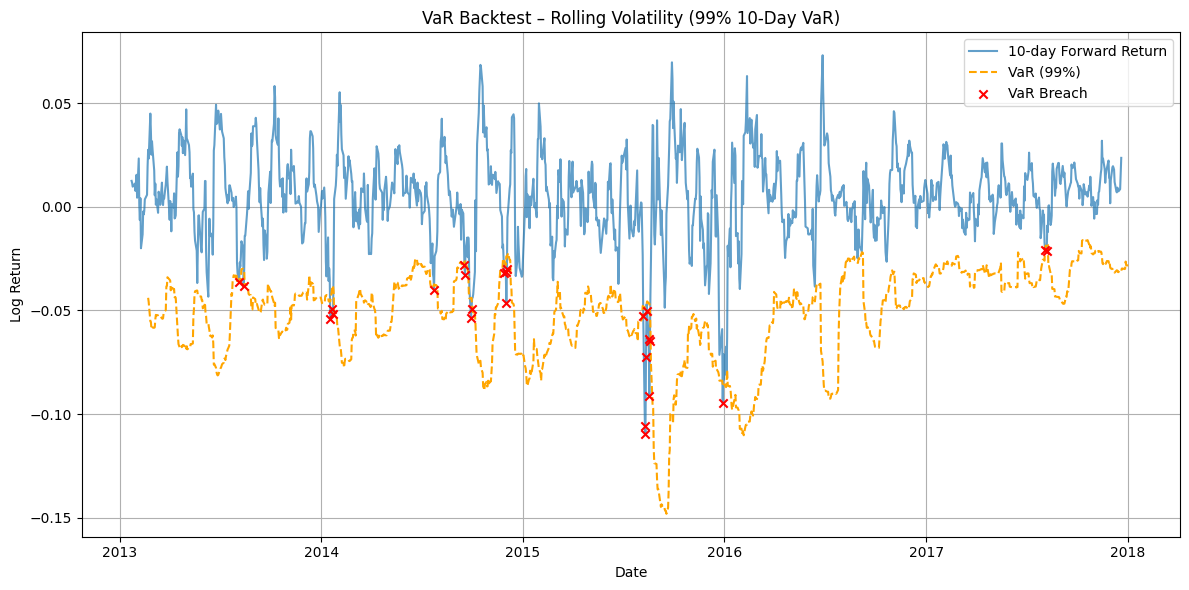

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
df = pd.read_csv("/Users/dave/PycharmProjects/PythonProject/PythonProject1/DLMFund/portfolio_risk/data/CQF E1 2025 - Data_SP500.csv", parse_dates=["Date"], dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

# Compute daily log returns
df["log_return"] = np.log(df["SP500"] / df["SP500"].shift(1))

# Parameters
z = norm.ppf(0.01)  # 99% confidence VaR
window = 21         # 21-day rolling window

# Rolling daily volatility
df["sigma_daily"] = df["log_return"].rolling(window=window).std()

# 10-day volatility projection
df["sigma_10d"] = df["sigma_daily"] * np.sqrt(10)

# VaR computation
df["VaR_10d"] = z * df["sigma_10d"]

# Forward 10-day log returns
df["r_10d_fwd"] = np.log(df["SP500"].shift(-10) / df["SP500"])

# Identify VaR breaches
df["breach"] = (df["r_10d_fwd"] < df["VaR_10d"]).astype(int)

# Count and stats
breach_count = df["breach"].sum()
total = df["breach"].count()
breach_pct = 100 * breach_count / total
consec_breach_count = ((df["breach"].shift(1) == 1) & (df["breach"] == 1)).sum()
consec_breach_pct = 100 * consec_breach_count / (total - 1)

print(f"VaR Breaches: {breach_count} / {total} = {breach_pct:.2f}%")
print(f"Consecutive Breaches: {consec_breach_count}")
print(f"Consecutive Breaches Percent: {consec_breach_pct:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["r_10d_fwd"], label="10-day Forward Return", alpha=0.7)
plt.plot(df["Date"], df["VaR_10d"], label="VaR (99%)", linestyle="--", color="orange")
plt.scatter(df.loc[df["breach"] == 1, "Date"], df.loc[df["breach"] == 1, "r_10d_fwd"],
            color="red", label="VaR Breach", marker="x", zorder=5)
plt.title("VaR Backtest – Rolling Volatility (99% 10-Day VaR)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 7: VaR Backtesting Using EWMA Volatility

We re-implement the 99% / 10-day VaR backtest using **EWMA volatility** instead of rolling standard deviation.

#### EWMA Model

The exponentially weighted moving average (EWMA) variance is given by:

$$
\sigma_{t+1|t}^2 = \lambda \sigma_t^2 + (1 - \lambda) r_t^2
$$

Where:
- $\lambda$ is the decay factor (set to 0.72)
- $\sigma_t^2$ is the variance estimate at time $t$
- $r_t$ is the daily log return

We initialize the recursion with the variance of the entire dataset as instructed.

#### VaR Computation

Same as before:

$$
\text{VaR}_{10D,t} = z \cdot \sigma_t \cdot \sqrt{10}
$$

#### Deliverables as requested follow the code

- (a) Count and percentage of VaR breaches
- (b) Count and percentage of consecutive breaches
- (c) Plot of 10-day returns and EWMA VaR with breaches marked


EWMA VaR Breaches: 32 / 1239 = 2.58%
Consecutive EWMA Breaches: 17
Consecutive EWMA Breaches Percent: 1.37%


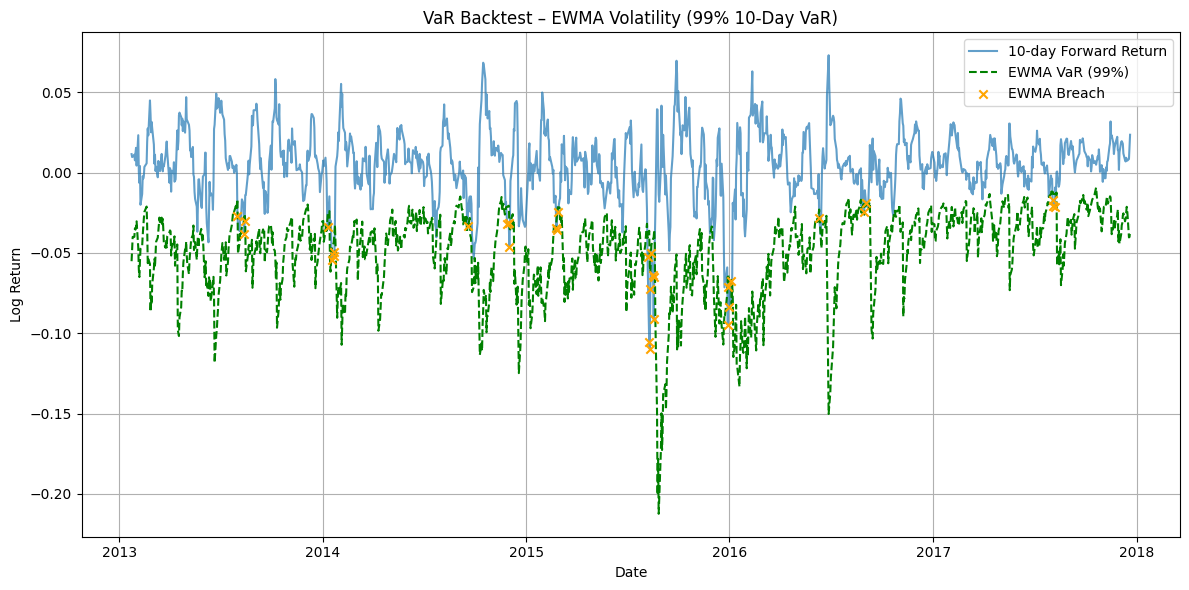

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
df = pd.read_csv(
    "/Users/dave/PycharmProjects/PythonProject/PythonProject1/DLMFund/portfolio_risk/data/CQF E1 2025 - Data_SP500.csv",
    parse_dates=["Date"],
    dayfirst=True
)
df = df.sort_values("Date").reset_index(drop=True)

# Compute daily log returns
df["log_return"] = np.log(df["SP500"] / df["SP500"].shift(1))
df = df.dropna(subset=["log_return"]).copy()

# Parameters
z = norm.ppf(0.01)  # 99% confidence level
lambda_ = 0.72      # EWMA decay factor

# Compute EWMA variance
returns = df["log_return"].values
ewma_var = np.zeros_like(returns)
ewma_var[0] = np.var(returns)

for t in range(1, len(returns)):
    ewma_var[t] = lambda_ * ewma_var[t - 1] + (1 - lambda_) * returns[t - 1] ** 2

# Store volatility and compute 10-day VaR
df["sigma_ewma"] = np.sqrt(ewma_var)
df["VaR_10d_ewma"] = z * df["sigma_ewma"] * np.sqrt(10)

# Compute 10-day forward return
df["r_10d_fwd"] = np.log(df["SP500"].shift(-10) / df["SP500"])
df["breach_ewma"] = (df["r_10d_fwd"] < df["VaR_10d_ewma"]).astype(int)

# Clean dataset
df_clean = df.dropna(subset=["VaR_10d_ewma", "r_10d_fwd", "breach_ewma"]).copy()

# Stats
breach_count = df_clean["breach_ewma"].sum()
total = df_clean["breach_ewma"].count()
breach_pct = 100 * breach_count / total
consec_breach_count = ((df_clean["breach_ewma"].shift(1) == 1) & (df_clean["breach_ewma"] == 1)).sum()
consec_breach_pct = 100 * consec_breach_count / total

# Output
print(f"EWMA VaR Breaches: {breach_count} / {total} = {breach_pct:.2f}%")
print(f"Consecutive EWMA Breaches: {consec_breach_count}")
print(f"Consecutive EWMA Breaches Percent: {consec_breach_pct:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_clean["Date"], df_clean["r_10d_fwd"], label="10-day Forward Return", alpha=0.7)
plt.plot(df_clean["Date"], df_clean["VaR_10d_ewma"], label="EWMA VaR (99%)", linestyle="--", color="green")
plt.scatter(
    df_clean.loc[df_clean["breach_ewma"] == 1, "Date"],
    df_clean.loc[df_clean["breach_ewma"] == 1, "r_10d_fwd"],
    color="orange", label="EWMA Breach", marker="x", zorder=5
)
plt.title("VaR Backtest – EWMA Volatility (99% 10-Day VaR)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()